In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [2]:
transit_df = pd.read_csv("../data/headway_data_with_datetimes.csv")

In [3]:
transit_df['ROUTE_ABBR'] = transit_df['ROUTE_ABBR'].str.replace('MURFEESBORO PIKE', 'MURFREESBORO PIKE')

In [4]:
transit_df['TRIP_ID_WITH_OVERLOAD'] = transit_df['CORRECTED_TRIP_ID'] + str(transit_df['OVERLOAD_ID'])

In [5]:
transit_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,2023-08-01 - 345105,22,ON TIME,2023-08-01 - 3451050 0\n1 0\n2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350323,120230930,2,100406610,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000,2023-09-30 - 353448,7,LATE,2023-09-30 - 3534480 0\n1 0\n2...
350324,120230930,2,100406611,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,551,0.000000,2023-09-30 - 353448,7,LATE,2023-09-30 - 3534480 0\n1 0\n2...
350325,120230930,2,100406612,2023-09-30,HILLSBORO,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000,2023-09-30 - 353449,7,ON TIME,2023-09-30 - 3534490 0\n1 0\n2...
350326,120230930,2,100406613,2023-09-30,HILLSBORO,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,563,0.000000,2023-09-30 - 353449,7,LATE,2023-09-30 - 3534490 0\n1 0\n2...


This commented cell was for creating the arrival status column and accounting for the adjusted column values

In [6]:
#Creating arrival status list
#arrival_status_col = []

#for time in transit_df["ADHERENCE"]:
#    if math.isnan(time) == True:
#        arrival_status = float('nan')
#    elif time > 1:
#        arrival_status = 'EARLY'
#    elif time <= 1 and time >= -6:
#        arrival_status = 'ON TIME'
#    elif time < -6:
#        arrival_status = 'LATE'
    #arrival_status_col.append(arrival_status)

#Creating arrival status column
#transit_df['ARRIVAL_STATUS'] = arrival_status_col

#Function to update arrival columns
#def update_arrival_status(row):
#    if row['ADJUSTED_EARLY_COUNT'] == 1:
#        return 'EARLY'
#    elif row['ADJUSTED_ONTIME_COUNT'] == 1:
#        return 'ON TIME'
#    elif row['ADJUSTED_LATE_COUNT'] == 1:
#        return 'LATE'
#    else:
#        return row['ARRIVAL_STATUS']

#Applying the function
#transit_df['ARRIVAL_STATUS'] = transit_df.apply(update_arrival_status, axis=1)

In [7]:
transit_df.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,2023-08-01 - 345105,22,ON TIME,2023-08-01 - 3451050 0\n1 0\n2...


In [8]:
transit_df.dtypes

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                    object
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [9]:
#Creating Acceptable_HDWY
acceptable_hdwy_col = []

for dev, schedule in (transit_df[['HDWY_DEV','SCHEDULED_HDWY']]).itertuples(index = False):
    if math.isnan(dev) == True:
        acceptable_hdwy = float('nan')
    elif abs(dev) <= 0.5*schedule:
        acceptable_hdwy = 'ACCEPTABLE'
    elif (abs(dev) > 0.5*schedule) and dev < 0:
        acceptable_hdwy = 'BUNCHING'
    elif (abs(dev) > 0.5*schedule) and dev > 0:
        acceptable_hdwy = 'GAPPING'
    acceptable_hdwy_col.append(acceptable_hdwy)

#Creating the column
transit_df['ACCEPTABLE_HDWY'] = acceptable_hdwy_col

In [10]:
transit_df.isna().sum()

CALENDAR_ID                      0
SERVICE_ABBR                     0
ADHERENCE_ID                     0
DATE                             0
ROUTE_ABBR                       0
BLOCK_ABBR                       0
OPERATOR                         0
TRIP_ID                          0
OVERLOAD_ID                      0
ROUTE_DIRECTION_NAME             0
TIME_POINT_ABBR                  0
ROUTE_STOP_SEQUENCE             11
TRIP_EDGE                        0
LATITUDE                         0
LONGITUDE                        0
SCHEDULED_TIME                   0
ACTUAL_ARRIVAL_TIME          11459
ACTUAL_DEPARTURE_TIME        11468
ADHERENCE                    11468
SCHEDULED_HDWY               75591
ACTUAL_HDWY                  84267
HDWY_DEV                     84436
ADJUSTED_EARLY_COUNT             0
ADJUSTED_LATE_COUNT              0
ADJUSTED_ONTIME_COUNT            0
STOP_CANCELLED                   0
PREV_SCHED_STOP_CANCELLED    70329
IS_RELIEF                        0
BLOCK_STOP_ORDER    

In [11]:
#transit_df.to_csv("../data/headway_data_with_routes.csv")

In [12]:
transit_df.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...,NaN
1,120230801,1,99457891,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...,NaN
2,120230801,1,99457892,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...,NaN
3,120230801,1,99457893,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...,NaN
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,2023-08-01 - 345105,22,ON TIME,2023-08-01 - 3451050 0\n1 0\n2...,NaN


In [13]:
transit_df['ARRIVAL_STATUS'].value_counts()

ON TIME    270047
LATE        59038
EARLY        9775
Name: ARRIVAL_STATUS, dtype: int64

## Question 5. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [14]:
transit_df['ADHERENCE']

0         -2.133333
1         -2.450000
2         -0.933333
3          6.283333
4         -1.583333
            ...    
350323    -8.433333
350324   -11.300000
350325    -4.316666
350326   -22.083333
350327   -23.666666
Name: ADHERENCE, Length: 350328, dtype: float64

In [15]:
transit_df['ARRIVAL_STATUS'].value_counts(normalize = True)

ON TIME    0.796928
LATE       0.174225
EARLY      0.028847
Name: ARRIVAL_STATUS, dtype: float64

In [16]:
transit_df['ARRIVAL_STATUS']

0         ON TIME
1         ON TIME
2         ON TIME
3         ON TIME
4         ON TIME
           ...   
350323       LATE
350324       LATE
350325    ON TIME
350326       LATE
350327       LATE
Name: ARRIVAL_STATUS, Length: 350328, dtype: object

Breakdown questions:
- Figure out how many drivers
- Top 5 drivers in dataframe
- Remove all duplicate Trip IDs and rerun top drivers
- On average how many trips does a driver take a day
- Split up dataframe by early, on-time, and late. 
- Determine % of on time for each operator and graph top

In [17]:
#How many drivers
transit_df['OPERATOR'].nunique()

341

In [18]:
#Top 5 drivers that appear
transit_df['OPERATOR'].value_counts().head()

2352    2970
1266    2911
1147    2710
1133    2625
2424    2577
Name: OPERATOR, dtype: int64

In [19]:
#How many trips
transit_df['TRIP_ID'].nunique()

3987

Dropping duplicate trip_ids doesn't work because the trip ID resets at the beginning of the next day

In [20]:
#Dropping duplicate trip_ids to find the unique trips
#unique_trips = transit_df.drop_duplicates(subset = 'TRIP_ID')
#unique_trips

In [21]:
#transit_df['DATE_STR'] = transit_df['DATE'].astype(str)
#transit_df['TRIP_ID_STR'] = transit_df['TRIP_ID'].astype(str)
#transit_df['CORRECTED_TRIP_ID'] = transit_df['DATE_STR'] + '-' + transit_df['TRIP_ID_STR']
#transit_df = transit_df.drop(columns = ['DATE_STR','TRIP_ID_STR'])
#transit_df

In [22]:
transit_df['CORRECTED_TRIP_ID'].nunique()

67370

In [23]:
unique_trips = transit_df.drop_duplicates(subset = 'CORRECTED_TRIP_ID')
unique_trips

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...,NaN
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,2023-08-01 - 345105,22,ON TIME,2023-08-01 - 3451050 0\n1 0\n2...,NaN
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,2023-08-01 - 345106,22,ON TIME,2023-08-01 - 3451060 0\n1 0\n2...,ACCEPTABLE
11,120230801,1,99457901,2023-08-01,BORDEAUX,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,97,10.800000,2023-08-01 - 345107,22,ON TIME,2023-08-01 - 3451070 0\n1 0\n2...,ACCEPTABLE
14,120230801,1,99457904,2023-08-01,BORDEAUX,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,124,12.533333,2023-08-01 - 345108,22,ON TIME,2023-08-01 - 3451080 0\n1 0\n2...,ACCEPTABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350313,120230930,2,100406600,2023-09-30,HILLSBORO,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,456,8.250000,2023-09-30 - 353445,7,ON TIME,2023-09-30 - 3534450 0\n1 0\n2...,ACCEPTABLE
350316,120230930,2,100406603,2023-09-30,HILLSBORO,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,482,4.183333,2023-09-30 - 353446,7,ON TIME,2023-09-30 - 3534460 0\n1 0\n2...,ACCEPTABLE
350319,120230930,2,100406606,2023-09-30,HILLSBORO,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,504,7.033333,2023-09-30 - 353447,7,ON TIME,2023-09-30 - 3534470 0\n1 0\n2...,ACCEPTABLE
350322,120230930,2,100406609,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,530,1.966666,2023-09-30 - 353448,7,LATE,2023-09-30 - 3534480 0\n1 0\n2...,ACCEPTABLE


In [24]:
unique_trips['OPERATOR'].value_counts().head(10)

1762    799
1761    735
2164    573
379     548
2352    546
1040    532
1170    532
1147    526
1617    523
1823    509
Name: OPERATOR, dtype: int64

In [25]:
#How many trips does a driver take a day?
trips_by_operator = unique_trips.groupby(['OPERATOR','DATE'])
trips_by_operator.count()['TRIP_ID'].mean()

8.629435122326118

In [26]:
#Subset dataframe for Operators with at least 10 trips
plus_10_operators = trips_by_operator.count().query("TRIP_ID >= 10 ").reset_index()
print("There are " + str(plus_10_operators['OPERATOR'].nunique()) + " operators with over 10 trips")
print("There are " + str(transit_df['OPERATOR'].nunique()) + " operators in total")
print("So " + str(round((((plus_10_operators['OPERATOR'].nunique())/(transit_df['OPERATOR'].nunique())*100)),0)) + "% of operators drove over 10 trips")

There are 224 operators with over 10 trips
There are 341 operators in total
So 66.0% of operators drove over 10 trips


In [27]:
plus_10_operators

,OPERATOR,DATE,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY
0,304,2023-08-01,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1,304,2023-08-02,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2,304,2023-08-03,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
3,304,2023-08-06,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
4,304,2023-08-07,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,3156,2023-09-10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2526,3156,2023-09-11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2527,3156,2023-09-12,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2528,3156,2023-09-13,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [28]:
headway_clean = transit_df.dropna(subset= 'HDWY_DEV')

In [29]:
adherence_clean = transit_df.dropna(subset = 'ADHERENCE')

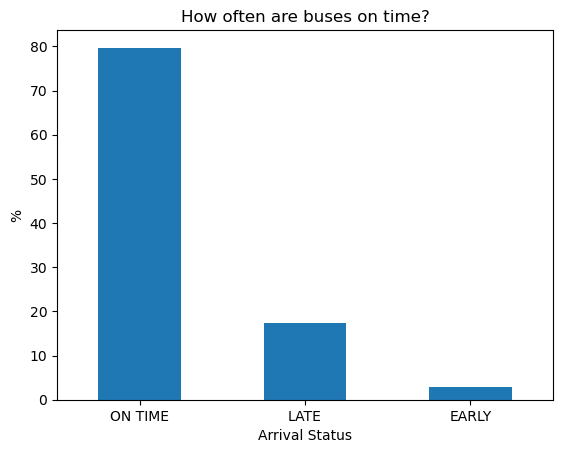

In [30]:
# Plot the Arrival Status as percentage
arrival_status_pct = round(adherence_clean['ARRIVAL_STATUS'].value_counts(normalize = True)*100,1)
arrival_status_pct.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Arrival Status')
plt.ylabel('%')
plt.title('How often are buses on time?');

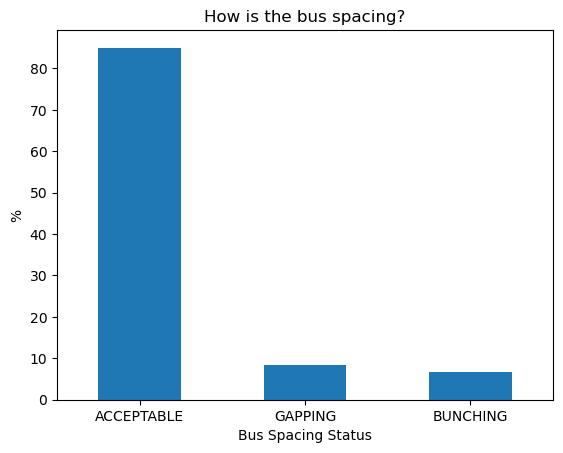

In [31]:
headway_clean_pct = round(headway_clean['ACCEPTABLE_HDWY'].value_counts(normalize = True) *100,1)
headway_clean_pct.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.xlabel('Bus Spacing Status')
plt.ylabel('%')
plt.title('How is the bus spacing?');

In [32]:
arrival_status_pct

ON TIME    79.7
LATE       17.4
EARLY       2.9
Name: ARRIVAL_STATUS, dtype: float64

In [33]:
adherence_clean.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS', 'CORRECTED_TRIP_ID', 'ROUTE_NUMBER', 'ARRIVAL_STATUS',
       'TRIP_ID_WITH_OVERLOAD', 'ACCEPTABLE_HDWY'],
      dtype='object')

In [34]:
#I want an on time % for each operator

In [35]:
adherence_clean['ACCEPTABLE_HDWY'].value_counts()

ACCEPTABLE    225920
GAPPING        21973
BUNCHING       17999
Name: ACCEPTABLE_HDWY, dtype: int64

In [36]:
on_time_counts = []
for status in adherence_clean['ARRIVAL_STATUS']:
    if status == 'ON TIME':
        on_time_count = 1
    else:
        on_time_count = float('nan')
    on_time_counts.append(on_time_count)
adherence_clean['ON_TIME'] = on_time_counts


acceptable_headway_counts = []
for status in headway_clean['ACCEPTABLE_HDWY']:
    if status == 'ACCEPTABLE':
        acceptable_headway_count = 1
    else:
        acceptable_headway_count = float('nan')
    acceptable_headway_counts.append(acceptable_headway_count)
headway_clean['HDWY_STATUS'] = acceptable_headway_counts

C:\Users\kidsa\AppData\Local\Temp\ipykernel_34800\3859513565.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adherence_clean['ON_TIME'] = on_time_counts
C:\Users\kidsa\AppData\Local\Temp\ipykernel_34800\3859513565.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headway_clean['HDWY_STATUS'] = acceptable_headway_counts


In [37]:
#Need a dataframe where there's arrival status
arrival_status_clean = transit_df.dropna(subset = 'ARRIVAL_STATUS')

In [38]:
adherence_operator_counts = adherence_clean.groupby('OPERATOR').count()
adherence_operator_counts['ON_TIME_PCT'] =(adherence_operator_counts['ON_TIME']/adherence_operator_counts['TRIP_ID'])*100

In [39]:
adherence_operator_counts

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY,ON_TIME,ON_TIME_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,100.000000
56,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,3,3,2,3,3,3,3,3,3,3,2,3,100.000000
235,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,9,9,9,12,12,12,12,9,12,12,12,12,12,12,12,9,6,50.000000
244,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,20,20,20,25,25,25,25,20,25,25,25,25,25,25,25,20,20,80.000000
301,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,30,30,30,37,37,37,37,30,37,37,37,37,37,37,37,30,19,51.351351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,57,56,56,88,88,88,88,66,88,88,88,88,88,88,88,56,76,86.363636
3156,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290,230,233,230,290,290,290,290,233,290,290,290,290,290,290,290,230,219,75.517241
3165,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,24,24,24,32,32,32,32,24,32,32,32,32,32,32,32,24,12,37.500000


In [40]:
headway_operator_counts = headway_clean.groupby("OPERATOR").count()

headway_operator_counts['ACCEPTABLE_HEADWAY_PCT'] =(headway_operator_counts['HDWY_STATUS']/headway_operator_counts['TRIP_ID'])*100

In [41]:
headway_operator_counts

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY,HDWY_STATUS,ACCEPTABLE_HEADWAY_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
56,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,100.000000
235,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,7,77.777778
244,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,13,65.000000
301,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,16,53.333333
304,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,2026,1901,93.830207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,52,92.857143
3156,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230,220,95.652174
3165,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,16,66.666667


In [42]:
headway_operator_counts.sum()['TRIP_ID']

265892.0

In [43]:
adherence_operator_counts.sum()['TRIP_ID']

338860.0

## Look at these plots on the trip level in addition to the stop level

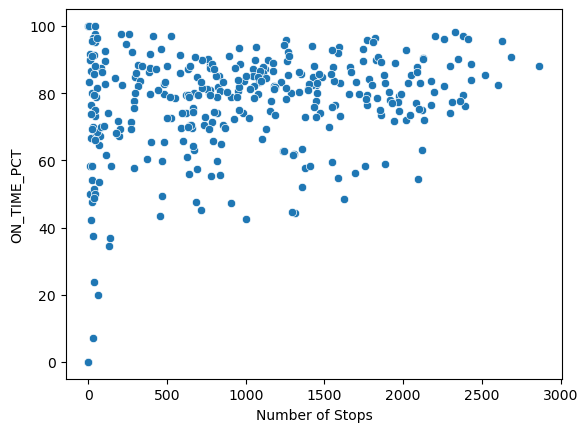

In [44]:
sns.scatterplot(data = adherence_operator_counts, x = 'TRIP_ID', y = 'ON_TIME_PCT')
plt.xlabel('Number of Stops')
plt.title('');

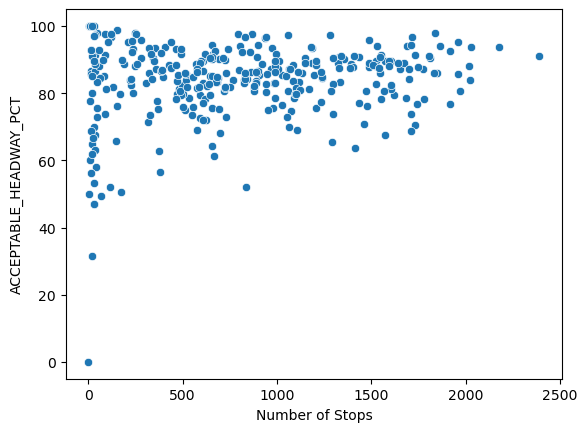

In [45]:
sns.scatterplot(data = headway_operator_counts, x = 'TRIP_ID', y = 'ACCEPTABLE_HEADWAY_PCT')
plt.xlabel('Number of Stops');

In [46]:
adherence_operator_counts['ON_TIME_PCT'].describe()

count    341.000000
mean      76.942911
std       15.290272
min        0.000000
25%       70.409357
50%       80.082702
75%       87.068966
max      100.000000
Name: ON_TIME_PCT, dtype: float64

In [47]:
adherence_operator_counts.query("ON_TIME_PCT == 100")

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY,ON_TIME,ON_TIME_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,100.0
56,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,3,3,3,2,3,3,3,3,3,3,3,2,3,100.0
2294,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,28,28,28,45,45,45,45,36,45,45,45,45,45,45,45,28,45,100.0


For each operator: Count the number of trips for a trip ID and compare it to on-time. Get an on-time percentage for that specific trip

In [48]:
adherence_trip_id_counts = adherence_clean.groupby(['OPERATOR','CORRECTED_TRIP_ID']).count()
adherence_trip_id_counts['ON_TIME_PCT_PER_TRIP'] = (adherence_trip_id_counts['ON_TIME'] / adherence_trip_id_counts['TRIP_ID']) * 100
adherence_sort = adherence_trip_id_counts.groupby('OPERATOR').mean().sort_values(by = 'ON_TIME_PCT_PER_TRIP', ascending = False)['ON_TIME_PCT_PER_TRIP'].reset_index()
adherence_sort

,OPERATOR,ON_TIME_PCT_PER_TRIP
0,0,100.000000
1,56,100.000000
2,2294,100.000000
3,1762,97.966963
4,1706,97.916667
...,...,...
336,2094,25.000000
337,1377,20.000000
338,2982,3.703704
339,473,0.000000


In [49]:
headway_clean

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY,HDWY_STATUS
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,2023-08-01 - 345106,22,ON TIME,2023-08-01 - 3451060 0\n1 0\n2...,ACCEPTABLE,1.0
8,120230801,1,99457898,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,70,0.000000,2023-08-01 - 345106,22,ON TIME,2023-08-01 - 3451060 0\n1 0\n2...,ACCEPTABLE,1.0
9,120230801,1,99457899,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,80,0.000000,2023-08-01 - 345106,22,ON TIME,2023-08-01 - 3451060 0\n1 0\n2...,ACCEPTABLE,1.0
11,120230801,1,99457901,2023-08-01,BORDEAUX,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,97,10.800000,2023-08-01 - 345107,22,ON TIME,2023-08-01 - 3451070 0\n1 0\n2...,ACCEPTABLE,1.0
12,120230801,1,99457902,2023-08-01,BORDEAUX,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,112,0.000000,2023-08-01 - 345107,22,EARLY,2023-08-01 - 3451070 0\n1 0\n2...,ACCEPTABLE,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350319,120230930,2,100406606,2023-09-30,HILLSBORO,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,504,7.033333,2023-09-30 - 353447,7,ON TIME,2023-09-30 - 3534470 0\n1 0\n2...,ACCEPTABLE,1.0
350322,120230930,2,100406609,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,530,1.966666,2023-09-30 - 353448,7,LATE,2023-09-30 - 3534480 0\n1 0\n2...,ACCEPTABLE,1.0
350323,120230930,2,100406610,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000,2023-09-30 - 353448,7,LATE,2023-09-30 - 3534480 0\n1 0\n2...,ACCEPTABLE,1.0
350325,120230930,2,100406612,2023-09-30,HILLSBORO,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000,2023-09-30 - 353449,7,ON TIME,2023-09-30 - 3534490 0\n1 0\n2...,ACCEPTABLE,1.0


In [50]:
headway_trip_id_counts = headway_clean.groupby(['OPERATOR','CORRECTED_TRIP_ID']).count()
headway_trip_id_counts['ON_TIME_PCT_PER_TRIP'] = (headway_trip_id_counts['HDWY_STATUS'] / headway_trip_id_counts['TRIP_ID']) * 100
headway_trip_id_counts

CALENDAR_ID  SERVICE_ABBR  ADHERENCE_ID  DATE  \
OPERATOR CORRECTED_TRIP_ID                                                    
56       2023-08-18 - 353106            2             2             2     2   
235      2023-08-30 - 350491            5             5             5     5   
         2023-08-30 - 350492            3             3             3     3   
         2023-08-30 - 350493            1             1             1     1   
244      2023-09-18 - 352640            5             5             5     5   
...                                   ...           ...           ...   ...   
3173     2023-09-28 - 350133            2             2             2     2   
         2023-09-28 - 350134            2             2             2     2   
         2023-09-28 - 350135            2             2             2     2   
         2023-09-28 - 350136            4             4             4     4   
         2023-09-28 - 350137            2             2             2     2   

                              ROUTE_ABBR  BLOCK_ABBR  TRIP_ID  OVERLOAD_ID  \
OPERATOR CORRECTED_TRIP_ID                                                   
56       2023-08-18 - 353106           2           2        2            2   
235      2023-08-30 - 350491           5           5        5            5   
         2023-08-30 - 350492           3           3        3            3   
         2023-08-30 - 350493           1           1        1            1   
244      2023-09-18 - 352640           5           5        5            5   
...                                  ...         ...      ...          ...   
3173     2023-09-28 - 350133           2           2        2            2   
         2023-09-28 - 350134           2           2        2            2   
         2023-09-28 - 350135           2           2        2            2   
         2023-09-28 - 350136           4           4        4            4   
         2023-09-28 - 350137           2           2        2            2   

                              ROUTE_DIRECTION_NAME  TIME_POINT_ABBR  \
OPERATOR CORRECTED_TRIP_ID                                            
56       2023-08-18 - 353106                     2                2   
235      2023-08-30 - 350491                     5                5   
         2023-08-30 - 350492                     3                3   
         2023-08-30 - 350493                     1                1   
244      2023-09-18 - 352640                     5                5   
...                                            ...              ...   
3173     2023-09-28 - 350133                     2                2   
         2023-09-28 - 350134                     2                2   
         2023-09-28 - 350135                     2                2   
         2023-09-28 - 350136                     4                4   
         2023-09-28 - 350137                     2                2   

                              ROUTE_STOP_SEQUENCE  TRIP_EDGE  LATITUDE  \
OPERATOR CORRECTED_TRIP_ID                                               
56       2023-08-18 - 353106                    2          2         2   
235      2023-08-30 - 350491                    5          5         5   
         2023-08-30 - 350492                    3          3         3   
         2023-08-30 - 350493                    1          1         1   
244      2023-09-18 - 352640                    5          5         5   
...                                           ...        ...       ...   
3173     2023-09-28 - 350133                    2          2         2   
         2023-09-28 - 350134                    2          2         2   
         2023-09-28 - 350135                    2          2         2   
         2023-09-28 - 350136                    4          4         4   
         2023-09-28 - 350137                    2          2         2   

                              LONGITUDE  SCHEDULED_TIME  ACTUAL_ARRIVAL_TIME  \
OPERATOR CORRECTED_T

In [51]:
headway_sort = headway_trip_id_counts.groupby('OPERATOR').mean().sort_values(by = 'ON_TIME_PCT_PER_TRIP', ascending = False)[['ON_TIME_PCT_PER_TRIP']]
top_10_operators_on_time = headway_sort.head(10)
bottom_10_operators_on_time = headway_sort.tail(10)

In [52]:
adherence_clean.drop_duplicates(subset = 'CORRECTED_TRIP_ID')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY,ON_TIME
0,120230801,1,99457890,2023-08-01,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,2023-08-01 - 345104,22,ON TIME,2023-08-01 - 3451040 0\n1 0\n2...,NaN,1.0
4,120230801,1,99457894,2023-08-01,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,2023-08-01 - 345105,22,ON TIME,2023-08-01 - 3451050 0\n1 0\n2...,NaN,1.0
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,2023-08-01 - 345106,22,ON TIME,2023-08-01 - 3451060 0\n1 0\n2...,ACCEPTABLE,1.0
11,120230801,1,99457901,2023-08-01,BORDEAUX,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,97,10.800000,2023-08-01 - 345107,22,ON TIME,2023-08-01 - 3451070 0\n1 0\n2...,ACCEPTABLE,1.0
14,120230801,1,99457904,2023-08-01,BORDEAUX,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,124,12.533333,2023-08-01 - 345108,22,ON TIME,2023-08-01 - 3451080 0\n1 0\n2...,ACCEPTABLE,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350313,120230930,2,100406600,2023-09-30,HILLSBORO,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,456,8.250000,2023-09-30 - 353445,7,ON TIME,2023-09-30 - 3534450 0\n1 0\n2...,ACCEPTABLE,1.0
350316,120230930,2,100406603,2023-09-30,HILLSBORO,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,482,4.183333,2023-09-30 - 353446,7,ON TIME,2023-09-30 - 3534460 0\n1 0\n2...,ACCEPTABLE,1.0
350319,120230930,2,100406606,2023-09-30,HILLSBORO,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,504,7.033333,2023-09-30 - 353447,7,ON TIME,2023-09-30 - 3534470 0\n1 0\n2...,ACCEPTABLE,1.0
350322,120230930,2,100406609,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,530,1.966666,2023-09-30 - 353448,7,LATE,2023-09-30 - 3534480 0\n1 0\n2...,ACCEPTABLE,NaN


In [53]:
transit_df['TRIP_ID_WITH_OVERLOAD'].nunique()

67370

In [54]:
unique_adherence_trips = adherence_clean.drop_duplicates(subset = 'TRIP_ID_WITH_OVERLOAD')
unique_adherence_trips.groupby('OPERATOR').count()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY,ON_TIME
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
56,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
235,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2
244,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
301,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
304,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,14,14,14,18,18,18,18,18,18,18,18,18,18,18,18,14,18
3156,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,45
3165,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,4


In [55]:
unique_headway_trips = headway_clean.drop_duplicates(subset = 'TRIP_ID_WITH_OVERLOAD')
unique_headway_trips.groupby('OPERATOR').count()['TRIP_ID'].reset_index()

,OPERATOR,TRIP_ID
0,56,1
1,235,3
2,244,4
3,301,6
4,304,407
...,...,...
328,3149,15
329,3156,54
330,3165,8
331,3166,5


In [56]:
headway_sort.reset_index()

,OPERATOR,ON_TIME_PCT_PER_TRIP
0,56,100.000000
1,3118,100.000000
2,2472,100.000000
3,2377,100.000000
4,2313,100.000000
...,...,...
329,2094,47.777778
330,2309,47.142857
331,1880,45.000000
332,2982,33.333333


In [57]:
operator_trips_pct = unique_headway_trips.groupby('OPERATOR').count()['TRIP_ID'].reset_index().merge(right = adherence_sort, how = 'inner', on = 'OPERATOR')
operator_trips_pct = operator_trips_pct[operator_trips_pct['OPERATOR'] != 2982]
headway_sort = operator_trips_pct.set_index('OPERATOR').sort_values(by = 'ON_TIME_PCT_PER_TRIP', ascending = False)
top_10_operators_on_time = headway_sort.head(10)
bottom_10_operators_on_time = headway_sort.tail(10)

In [58]:
headway_sort

,TRIP_ID,ON_TIME_PCT_PER_TRIP
OPERATOR,,
56,1,100.000000
2294,7,100.000000
1762,779,97.966963
1706,8,97.916667
1597,38,97.596154
...,...,...
235,3,39.285714
3165,8,37.500000
1016,7,36.450893


In [59]:
top_10_operators_on_time

,TRIP_ID,ON_TIME_PCT_PER_TRIP
OPERATOR,,
56,1,100.000000
2294,7,100.000000
1762,779,97.966963
1706,8,97.916667
1597,38,97.596154
2573,63,97.241119
409,463,97.132616
2355,156,97.094017
2639,60,96.846847


In [60]:
bottom_10_operators_on_time

,TRIP_ID,ON_TIME_PCT_PER_TRIP
OPERATOR,,
3101,232,46.699134
2714,118,46.088154
3098,84,45.416667
2312,478,45.392954
3096,175,41.950758
235,3,39.285714
3165,8,37.500000
1016,7,36.450893
2400,7,33.750000


<Axes: xlabel='TRIP_ID', ylabel='ON_TIME_PCT_PER_TRIP'>

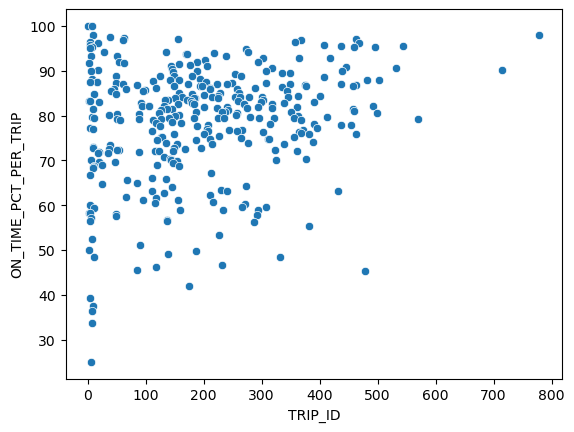

In [61]:
sns.scatterplot(headway_sort, x = 'TRIP_ID', y = 'ON_TIME_PCT_PER_TRIP')

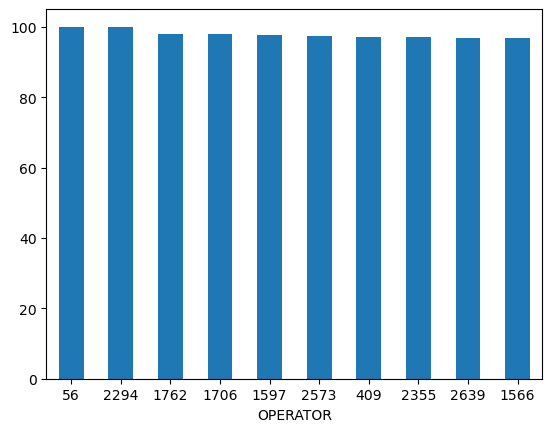

In [62]:
top_10_operators_on_time['ON_TIME_PCT_PER_TRIP'].plot(kind = 'bar')
plt.xticks(rotation = 0);

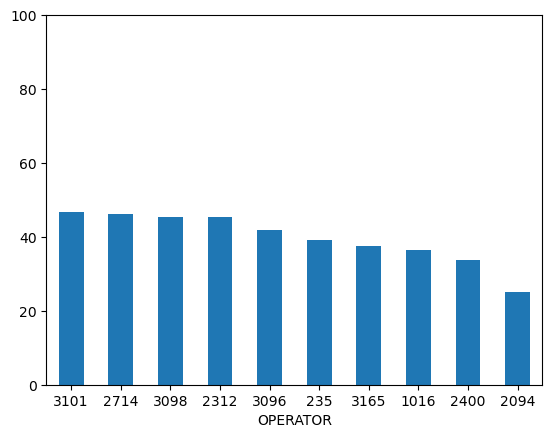

In [63]:
bottom_10_operators_on_time['ON_TIME_PCT_PER_TRIP'].plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylim(0,100);

<Axes: xlabel='TRIP_ID', ylabel='ON_TIME_PCT_PER_TRIP'>

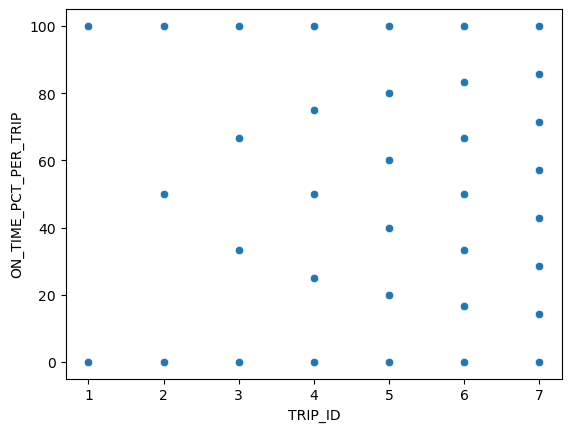

In [64]:
sns.scatterplot(adherence_trip_id_counts, x = 'TRIP_ID', y = 'ON_TIME_PCT_PER_TRIP')

<Axes: xlabel='TRIP_ID', ylabel='ON_TIME_PCT_PER_TRIP'>

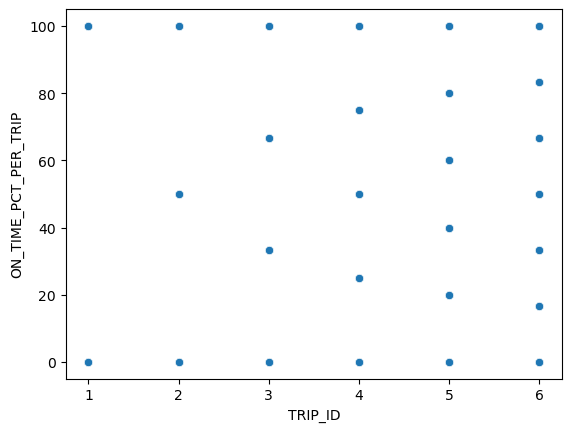

In [65]:
sns.scatterplot(headway_trip_id_counts, x = 'TRIP_ID', y = 'ON_TIME_PCT_PER_TRIP')

3 Operators were on time for 100% of their stops. 2 of them had less than 5 stops but operator 2294 was on-time 100% of the time with 45 stops.

In [66]:
adherence_operator_counts.query('ON_TIME_PCT >= 79.7').count()['TRIP_ID']

177

In [67]:
177/341

0.5190615835777126

In [68]:
adherence_operator_counts.query("ON_TIME_PCT < 40")

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY,ON_TIME,ON_TIME_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
473,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0.000000
656,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0.000000
1016,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,115,115,115,138,138,138,138,118,138,138,138,138,138,138,138,115,51,36.956522
1377,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,0,0,0,60,60,60,60,30,60,60,60,60,60,60,60,0,12,20.000000
2094,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,32,32,32,38,38,38,38,32,38,38,38,38,38,38,38,32,9,23.684211
2400,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,69,69,69,130,130,130,130,94,130,130,130,130,130,130,130,69,45,34.615385
2982,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,19,19,19,28,28,28,28,19,28,28,28,28,28,28,28,19,2,7.142857
3165,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,24,24,24,32,32,32,32,24,32,32,32,32,32,32,32,24,12,37.500000


In [69]:
headway_operator_counts['ACCEPTABLE_HEADWAY_PCT'].describe()

count    334.000000
mean      83.620635
std       11.366876
min        0.000000
25%       79.803962
50%       85.889131
75%       90.428604
max      100.000000
Name: ACCEPTABLE_HEADWAY_PCT, dtype: float64

In [70]:
headway_operator_counts.query("ACCEPTABLE_HEADWAY_PCT == 100")

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY,HDWY_STATUS,ACCEPTABLE_HEADWAY_PCT
OPERATOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
56,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,100.0
2294,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,100.0
2313,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,100.0
2377,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,100.0
2472,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,100.0
2494,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,100.0
3077,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,100.0
3118,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,100.0


I wonder if the ON_TIME_PCT is more dependent on the location

In [71]:
adherence_clean.describe()[['ADHERENCE','HDWY_DEV']]

,ADHERENCE,HDWY_DEV
count,338860.000000,265892.000000
mean,-3.188795,0.518068
std,6.898852,7.161809
min,-948.533333,-64.000000
25%,-4.566666,-2.316667
50%,-2.000000,0.033333
75%,-0.333333,2.483333
max,88.383333,565.433333


Reminder: **Negative** Adherence = **Late** \
          **Postive** Adherence = **Early** \
          **Negative** Headway = **Bunching**  
          **Positive** Headway = **Gapping**

(-15.0, 10.0)

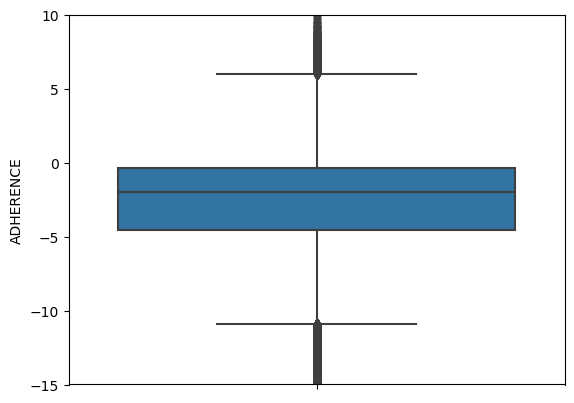

In [72]:
sns.boxplot(data = adherence_clean, y = 'ADHERENCE');
plt.ylim(-15,10)

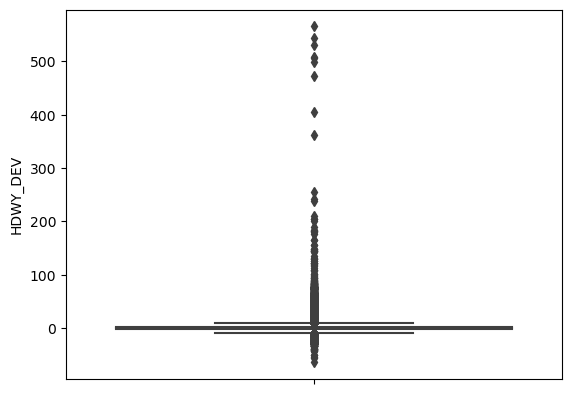

In [73]:
sns.boxplot(data = headway_clean, y = 'HDWY_DEV');

Ideas for boxplot:
- Make it more readable (see what's going on with the outliers)
- For headway get a headway percentage with HDWY_DEV and SCHEDULED_HDWY column (possibly remove headways with outrageous perentages; try to figure out what's going on with the outliers)

## Question 6. How does direction of travel, route, or location affect the headway and on-time performance?

In [74]:
transit_df.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS', 'CORRECTED_TRIP_ID', 'ROUTE_NUMBER', 'ARRIVAL_STATUS',
       'TRIP_ID_WITH_OVERLOAD', 'ACCEPTABLE_HDWY'],
      dtype='object')

- See which routes have the best on-time % and acceptable headway %
- Compare on time % and acceptable headway % by direction of travel

### Which routes have the best on time % and acceptable headway %

**On time %**

In [75]:
transit_df["ROUTE_ABBR"].value_counts()

MURFREESBORO PIKE    61944
GALLATIN PIKE        60020
NOLENSVILLE PIKE     51819
WEST END             47162
CHARLOTTE PIKE       43291
DICKERSON PIKE       42108
BORDEAUX             25958
HILLSBORO            18026
Name: ROUTE_ABBR, dtype: int64

In [76]:
arrival_status_clean.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS', 'CORRECTED_TRIP_ID', 'ROUTE_NUMBER', 'ARRIVAL_STATUS',
       'TRIP_ID_WITH_OVERLOAD', 'ACCEPTABLE_HDWY'],
      dtype='object')

In [77]:
transit_df.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS', 'CORRECTED_TRIP_ID', 'ROUTE_NUMBER', 'ARRIVAL_STATUS',
       'TRIP_ID_WITH_OVERLOAD', 'ACCEPTABLE_HDWY'],
      dtype='object')

In [78]:
arrival_status_clean['ROUTE_ABBR'].value_counts()

MURFREESBORO PIKE    60359
GALLATIN PIKE        58950
NOLENSVILLE PIKE     49327
WEST END             45488
CHARLOTTE PIKE       42629
DICKERSON PIKE       39653
BORDEAUX             25187
HILLSBORO            17267
Name: ROUTE_ABBR, dtype: int64

In [79]:
acceptable_headway_clean = transit_df.dropna(subset = 'ACCEPTABLE_HDWY')
acceptable_headway_clean

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,CORRECTED_TRIP_ID,ROUTE_NUMBER,ARRIVAL_STATUS,TRIP_ID_WITH_OVERLOAD,ACCEPTABLE_HDWY
7,120230801,1,99457897,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,2023-08-01 - 345106,22,ON TIME,2023-08-01 - 3451060 0\n1 0\n2...,ACCEPTABLE
8,120230801,1,99457898,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,70,0.000000,2023-08-01 - 345106,22,ON TIME,2023-08-01 - 3451060 0\n1 0\n2...,ACCEPTABLE
9,120230801,1,99457899,2023-08-01,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,80,0.000000,2023-08-01 - 345106,22,ON TIME,2023-08-01 - 3451060 0\n1 0\n2...,ACCEPTABLE
11,120230801,1,99457901,2023-08-01,BORDEAUX,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,97,10.800000,2023-08-01 - 345107,22,ON TIME,2023-08-01 - 3451070 0\n1 0\n2...,ACCEPTABLE
12,120230801,1,99457902,2023-08-01,BORDEAUX,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,112,0.000000,2023-08-01 - 345107,22,EARLY,2023-08-01 - 3451070 0\n1 0\n2...,ACCEPTABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350319,120230930,2,100406606,2023-09-30,HILLSBORO,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,504,7.033333,2023-09-30 - 353447,7,ON TIME,2023-09-30 - 3534470 0\n1 0\n2...,ACCEPTABLE
350322,120230930,2,100406609,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,530,1.966666,2023-09-30 - 353448,7,LATE,2023-09-30 - 3534480 0\n1 0\n2...,ACCEPTABLE
350323,120230930,2,100406610,2023-09-30,HILLSBORO,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,539,0.000000,2023-09-30 - 353448,7,LATE,2023-09-30 - 3534480 0\n1 0\n2...,ACCEPTABLE
350325,120230930,2,100406612,2023-09-30,HILLSBORO,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,552,0.000000,2023-09-30 - 353449,7,ON TIME,2023-09-30 - 3534490 0\n1 0\n2...,ACCEPTABLE


In [80]:
on_time_counts = []
for status in arrival_status_clean['ARRIVAL_STATUS']:
    if status == 'ON TIME':
        on_time_count = 1
    else:
        on_time_count = float('nan')
    on_time_counts.append(on_time_count)
arrival_status_clean['ON_TIME'] = on_time_counts

C:\Users\kidsa\AppData\Local\Temp\ipykernel_34800\4156839522.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrival_status_clean['ON_TIME'] = on_time_counts


In [81]:
acceptable_headway_counts = []
for status in acceptable_headway_clean['ACCEPTABLE_HDWY']:
    if status == 'ACCEPTABLE':
        acceptable_headway_count = 1
    else:
        acceptable_headway_count = float('nan')
    acceptable_headway_counts.append(acceptable_headway_count)
headway_clean['HDWY_STATUS'] = acceptable_headway_counts

C:\Users\kidsa\AppData\Local\Temp\ipykernel_34800\3783413110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headway_clean['HDWY_STATUS'] = acceptable_headway_counts


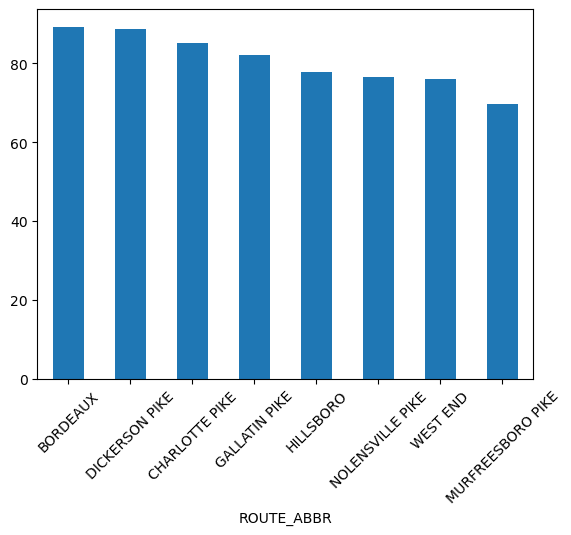

In [82]:
on_time_performance_by_route_abbr = arrival_status_clean.groupby('ROUTE_ABBR').count()[['ARRIVAL_STATUS','ON_TIME']]
on_time_performance_by_route_abbr_table = ((on_time_performance_by_route_abbr['ON_TIME']/ on_time_performance_by_route_abbr['ARRIVAL_STATUS'])*100).sort_values(ascending = False)
on_time_performance_by_route_abbr_table.plot(kind = 'bar')
plt.xticks(rotation = 45);

**Question for Michael**: Does this graph above look too cluttered with the Route names

In [83]:
on_time_performance_by_route_abbr_table.reset_index().set_index('ROUTE_ABBR')

,0
ROUTE_ABBR,
BORDEAUX,89.296065
DICKERSON PIKE,88.611202
CHARLOTTE PIKE,85.174412
GALLATIN PIKE,82.037320
HILLSBORO,77.703133
NOLENSVILLE PIKE,76.501713
WEST END,75.879353
MURFREESBORO PIKE,69.716198


In [84]:
on_time_performance_by_route_abbr_table.reset_index().set_index('ROUTE_ABBR')[0].reset_index()

,ROUTE_ABBR,0
0,BORDEAUX,89.296065
1,DICKERSON PIKE,88.611202
2,CHARLOTTE PIKE,85.174412
3,GALLATIN PIKE,82.037320
4,HILLSBORO,77.703133
5,NOLENSVILLE PIKE,76.501713
6,WEST END,75.879353
7,MURFREESBORO PIKE,69.716198


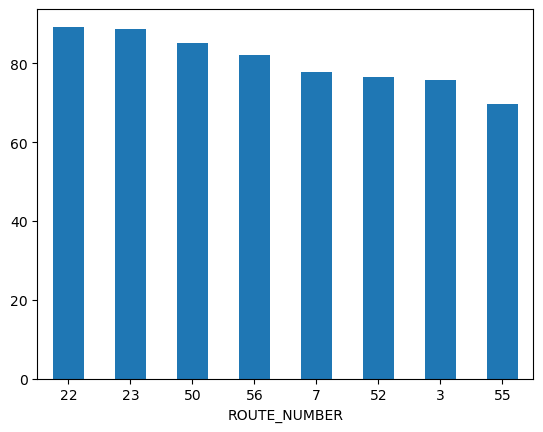

In [85]:
on_time_performance_by_route_number = arrival_status_clean.groupby('ROUTE_NUMBER').count()[['ARRIVAL_STATUS','ON_TIME']]
on_time_performance_by_route_number_table = ((on_time_performance_by_route_number['ON_TIME']/ on_time_performance_by_route_number['ARRIVAL_STATUS'])*100).sort_values(ascending = False)
on_time_performance_by_route_number_table.plot(kind = 'bar')
plt.xticks(rotation = 0);

In [86]:
on_time_performance_by_route_number_table.reset_index().set_index('ROUTE_NUMBER')

,0
ROUTE_NUMBER,
22,89.296065
23,88.611202
50,85.174412
56,82.037320
7,77.703133
52,76.501713
3,75.879353
55,69.716198


In [87]:
transit_df[transit_df['ROUTE_ABBR'].duplicated() == False][['ROUTE_NUMBER','ROUTE_ABBR']].set_index('ROUTE_NUMBER')

,ROUTE_ABBR
ROUTE_NUMBER,
22,BORDEAUX
23,DICKERSON PIKE
3,WEST END
7,HILLSBORO
50,CHARLOTTE PIKE
52,NOLENSVILLE PIKE
55,MURFREESBORO PIKE
56,GALLATIN PIKE


In [88]:
transit_df['ROUTE_ABBR'] == 'BORDEAUX'

0          True
1          True
2          True
3          True
4          True
          ...  
350323    False
350324    False
350325    False
350326    False
350327    False
Name: ROUTE_ABBR, Length: 350328, dtype: bool

**Headway %**

In [89]:
headway_clean['ROUTE_ABBR'].value_counts()

MURFREESBORO PIKE    49432
GALLATIN PIKE        48335
NOLENSVILLE PIKE     39887
WEST END             36583
CHARLOTTE PIKE       34593
DICKERSON PIKE       28478
BORDEAUX             17006
HILLSBORO            11578
Name: ROUTE_ABBR, dtype: int64